02450 Project 2

In [23]:
import os
import numpy as np
import glob
import PIL.Image as Image
from tqdm.notebook import tqdm
import xlrd
import scipy
from scipy.linalg import svd

import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision.datasets as datasets
# from torch.utils.data import DataLoader
# import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

import sklearn.linear_model as lm
from matplotlib.pylab import figure, hist, plot, show, subplot, xlabel, ylabel



Load data from csv file

In [5]:
cwd = os.getcwd()
data = pd.read_csv(cwd + '/usa_wood_data_formatted.csv')
# print(data.head())  


Clean data by removing columns with significant amount of missing values

In [ ]:
removed_columns = ['side_hardness','tension_perpendicular_to_grain','impact_bending']
data_cleaned = data.drop(columns=removed_columns)
data_cleaned = data_cleaned.dropna()
print(data_cleaned.isnull().sum()) # 0 means data is clean

data_arr = np.array(data_cleaned)  # Attributes are columns
y = data_arr[:,6]
X = data_arr[:,7:12]

common_species_name                   0
genus                                 0
species                               0
scientific_name                       0
classification                        0
moisture_content                      0
specific_gravity                      0
modulus_of_rupture                    0
modulus_of_elasticity                 0
work_to_maximum_load                  0
compression_parallel_to_grain         0
compression_perpendicular_to_grain    0
shear_parallel_to_grain               0
dtype: int64
[0.37 0.41 0.45 0.49 0.53 0.58 0.53 0.56 0.5 0.55 0.55 0.6 0.36 0.39 0.35
 0.38 0.32 0.37 0.56 0.64 0.48 0.55 0.6 0.65 0.55 0.62 0.36 0.38 0.47 0.5
 0.4 0.43 0.31 0.34 0.31 0.35 0.37 0.4 0.46 0.5 0.57 0.63 0.48 0.53 0.49
 0.53 0.6 0.56 0.6 0.66 0.61 0.64 0.72 0.66 0.75 0.64 0.72 0.62 0.69 0.6
 0.66 0.69 0.44 0.48 0.46 0.5 0.44 0.48 0.52 0.57 0.49 0.54 0.44 0.47 0.56
 0.63 0.56 0.61 0.61 0.68 0.56 0.63 0.56 0.63 0.58 0.63 0.6 0.67 0.52 0.59
 0.56 0.63 0.56 0.69 0.

Linear Regression

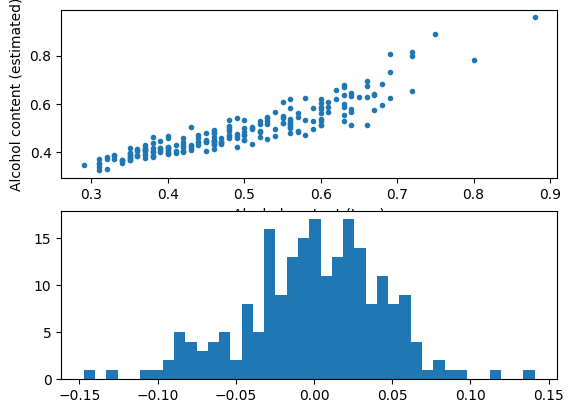

In [24]:
# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# Compute model output:
y_est = model.predict(X)
residual = y_est - y

# Display scatter plot
figure()
subplot(2, 1, 1)
plot(y, y_est, ".")
xlabel("Alcohol content (true)")
ylabel("Alcohol content (estimated)")
subplot(2, 1, 2)
hist(residual, 40)

show()